# Timings plotting

In [7]:
%matplotlib inline

from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class Results:
    name: str
    N: np.ndarray
    comp_t: np.ndarray
    offload_t: np.ndarray
    runtime: np.ndarray

In [26]:
# Define IT_NUM as number of iterations for the results
# The last line is results for N, mem_usage, mflops

# get the time averages for each N
# plot N vs time average for each iter

# Getting the data
names = [
    # "mnk",
    # "blk",
    # "asy",
    "asy_5",
    "asy_9"
]
results_files = [
    # "./timings/timing_mnk_offload.txt",
    # './timings/timing_blk_offload.txt',
    # './timings/timing_asy_offload.txt',
    './timings/timing_asy_offload_5.txt',
    './timings/timing_asy_offload_9.txt'
]
IT_NUM = 10
results_dict:Dict[str,Results]=dict()
for name, file in zip(names,results_files):
    data = np.loadtxt(file, delimiter=',')
    res = Results(
        name=name,
        N = data[:,0],
        comp_t=data[:,1],
        offload_t=data[:,2],
        runtime=data[:,1]+data[:,2]
    )
    results_dict[name] = res


# Getting the averages for each N
Ns = np.unique(results_dict['asy_5'].N)

avg_dict:Dict[str,list]=dict()

for name in names:
    avg_dict[name] = [[],[],[]] # comp, data, runtime
    for N in Ns:
        res = results_dict[name]
        idxs = np.where(res.N == N)[0]
        comp_avg = res.comp_t[idxs].mean()
        dataoff_avg = res.offload_t[idxs].mean()
        runtime_avg = res.runtime[idxs].mean()
        avg_dict[name][0].append(comp_avg)
        avg_dict[name][1].append(dataoff_avg)
        avg_dict[name][2].append(runtime_avg)
        

In [17]:
len(avg_dict['asy'][0])

9

In [19]:
for i in range(len(Ns)):
    comp_mnk = avg_dict['asy'][0][i]
    comp_blk = avg_dict['asy_5'][0][i]
    print(f"N: {Ns[i]} comptime: asy: {comp_mnk}, asy_5: {comp_blk}")
    # print(Ns[i], avg_dict['mnk'][0][i])

N: 100.0 comptime: asy: 19.7709083, asy_5: 16.703677300000003
N: 200.0 comptime: asy: 10.3461265, asy_5: 22.2729445
N: 500.0 comptime: asy: 21.9626666, asy_5: 16.096282
N: 1000.0 comptime: asy: 27.324461900000006, asy_5: 46.4442968
N: 2000.0 comptime: asy: 163.0027056, asy_5: 245.3962087
N: 3000.0 comptime: asy: 527.5159122, asy_5: 881.0335875000001
N: 4500.0 comptime: asy: 1723.4415769, asy_5: 3099.8517039000003
N: 5000.0 comptime: asy: 2429.2658091000003, asy_5: 4107.1592092
N: 6000.0 comptime: asy: 4023.8799094999995, asy_5: 6723.1119156


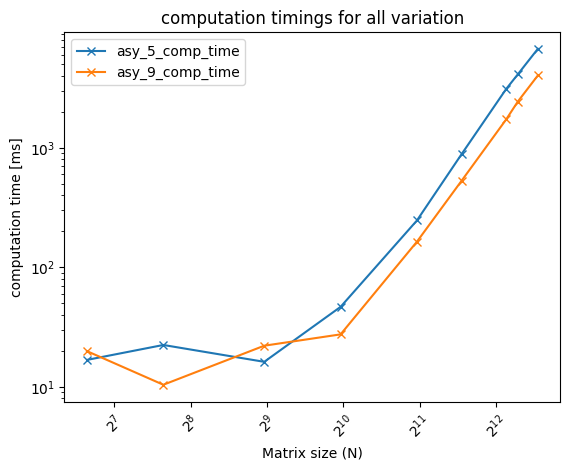

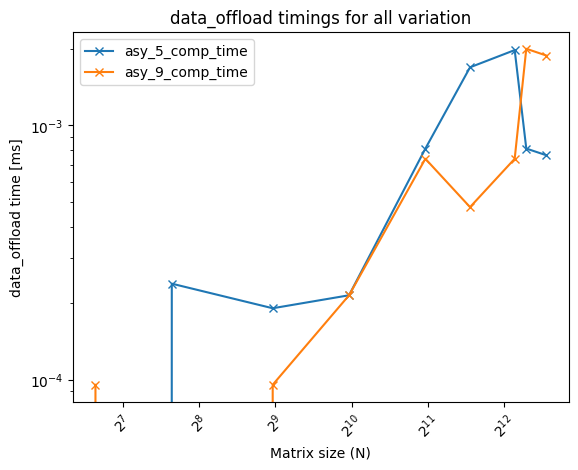

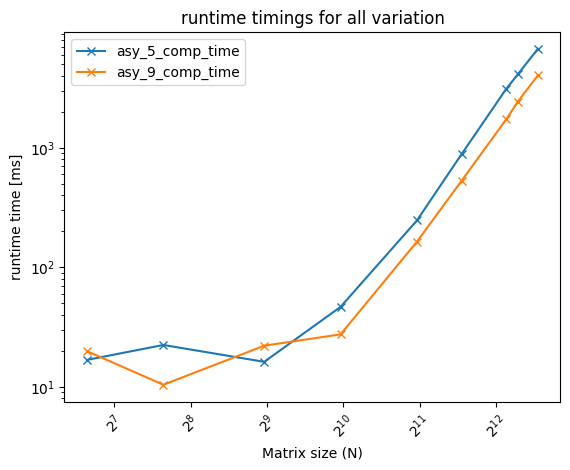

In [27]:
Ps = ['computation','data_offload','runtime']
for i, p in enumerate(Ps):
    plt.figure()
    titel = f"{p} timings for all variation"
    plt.title(titel)
    for name in names:
        # if name not in ['blk','asy']:
        #     continue
        res = avg_dict[name]
        plt.plot(Ns, res[i],"-x",label=f"{name}_comp_time")
    plt.legend()

    # log scale for Y axis
    plt.yscale('log', base=10)
    plt.xscale('log', base=2)

    # make the ticks on an angle
    plt.xticks(rotation=45)

    plt.xlabel('Matrix size (N)')
    plt.ylabel(f'{p} time [ms]')

    # plt.savefig(f"timing_{p}")
    plt.show()

        


